Neuraminidase Protein Sequencing Using Bayesian Neural Networks

Ryan Berwick, David Harris, William Howe, Varun Jagannath

Bayesian Neural Networks (BNNs) are a significant extension of traditional neural networks, allowing for uncertainty quantification in both the model parameters and predictions. The ability to capture and reason about uncertainty makes BNNs particularly valuable in critical situations where reliability and confidence in predictions are essential, such as medical diagnosis and autonomous systems. This study focuses on the implementation and performance of the BNN, the primary focus of this study, with a secondary comparison to a simplified transformer-based model when studying neuraminidase protein sequence classification.We found that the BNN and the Transformer model both perfectly classified the neuraminidase sequences but the Transformer model had greater training efficiency.  Despite comparable accuracy, the choice of the BNN for this study reflects its unique ability to quantify uncertainty in predictions, a critical feature given the variability in structural alignment metrics produced by algorithms such as FATCAT, TM-align, and Smith-Waterman 3D used to generate the pairwise sequence alignments. These metrics, combined with ProtBERT embeddings, enabled both models to integrate sequence-level and structural insights effectively. The results highlight the complementary strengths of BNNs and Transformers, with the BNN being particularly advantageous in tasks where interpretability and robustness are of high importance.

In [ ]:
import pandas as pd



dataset = "All_Table_Meta_Data_CHM_Final.csv"
data = pd.read_csv(dataset)
print(f"there are {len(data)} rows in {dataset}")

selected_columns_corrected = [
    'N2 RMSD',
    'Nx RMSD',
    'N2 Similarity Score',
    'Nx Similarity Score',
    '% Sequence Similarity',
    'N2 % Identity',
    'Nx % Identity',
    'N2 TM Score',
    'Nx TM Score',
    'N2 % Of Sequenced That Was Covered In Alignment',
    'Nx % Of Sequenced That Was Covered In Alignment',
    'Number of Residues in N2 PDB File',
    'Number of Residues in Nx PDB File',
    'N2 FASTA Seq Length',
    'N2 PDB Seq Length',
    'N2 Gap Sequence Length',
    'Nx Gap Sequence Length',
    'N2 Total Number of Gaps',
    'Nx Total Number of Gaps',
    'N2 Pymol Name',
    'Nx Pymol Name',
    'Nx Type',
    'N2 Sequence With Gaps',
    'Nx Sequence With Gaps',
    'Algorithm Reported Length Of Both Sequences With Gaps'
]



column_pairs_to_replace = [
    ('N2 RMSD', 'Nx RMSD'),
    ('N2 Similarity Score', 'Nx Similarity Score'),
    ('% Sequence Similarity', '% Sequence Similarity'),  # Same column
    ('N2 % Identity', 'Nx % Identity'),
    ('N2 TM Score', 'Nx TM Score')
]


for col1, col2 in column_pairs_to_replace:
    if (col1, col2) == ('N2 RMSD', 'Nx RMSD'):

        neutral_value = data.loc[
            (data[col1] != 0.0) & (data[col2] != 0.0),
            [col1, col2]
        ].stack().mean()


        data.loc[data[col1] == 0.0, col1] = data[col2].replace(0.0, neutral_value)
        data.loc[data[col2] == 0.0, col2] = data[col1].replace(0.0, neutral_value)
    else:

        data.loc[data[col1] == 0.0, col1] = data[col2]
        data.loc[data[col2] == 0.0, col2] = data[col1]


print("Replacement completed. Sample data:")





if "0.0000000000000000000000" in data['N2 % Identity'].values:
    print('"0.0000000000000000000000" is present in the N2 % Identity column.')
else:
    print('"0.0000000000000000000000" is not present in the N2 % Identity column.')


if (data['N2 % Identity'] == 0.0).any():
    print("0.0 is present in the N2 % Identity column.")
else:
    print("0.0 is not present in the N2 % Identity column.")


if (data['N2 % Identity'] == 0.0000000000000000000000).any():
    print("0.0000000000000000000000 FLOAT is present in the N2 % Identity column.")
else:
    print("0.0000000000000000000000 FLOAT is not present in the N2 % Identity column.")

columns_to_convert = [
    'N2 RMSD',
    'Nx RMSD',
    'N2 Similarity Score',
    'Nx Similarity Score',
    '% Sequence Similarity',
    'N2 % Identity',
    'Nx % Identity',
    'N2 TM Score',
    'Nx TM Score'
]





for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')


data.fillna(0, inplace=True)  # Replace NaN with 0



print(data[columns_to_convert].dtypes)
print(data[columns_to_convert].head())

unique_N2s = data["N2 ID"].unique()
unique_Nx_with_types = data[['Nx ID', 'Nx Type']].drop_duplicates()


filtered_data_corrected = data[selected_columns_corrected]


filtered_data_corrected = filtered_data_corrected.dropna()


missing_values_summary_corrected = filtered_data_corrected.isnull().sum()

N2_seqs =filtered_data_corrected[['N2 Pymol Name','N2 Sequence With Gaps']]
Nx_seqs = filtered_data_corrected[['Nx Pymol Name','Nx Sequence With Gaps']]


print(filtered_data_corrected.columns)



filtered_data_corrected




there are 46710 rows in All_Table_Meta_Data_CHM_Final.csv
Replacement completed. Sample data:
"0.0000000000000000000000" is not present in the N2 % Identity column.
0.0 is not present in the N2 % Identity column.
0.0000000000000000000000 FLOAT is not present in the N2 % Identity column.
N2 RMSD                  float64
Nx RMSD                  float64
N2 Similarity Score      float64
Nx Similarity Score      float64
% Sequence Similarity    float64
N2 % Identity            float64
Nx % Identity            float64
N2 TM Score              float64
Nx TM Score              float64
dtype: object
   N2 RMSD  Nx RMSD  N2 Similarity Score  Nx Similarity Score  \
0     1.28     1.28               754.00               754.00   
1     1.22     1.22               780.45               780.45   
2     1.21     1.21               786.96               786.96   
3     1.21     1.21               790.23               790.23   
4     1.23     1.23               777.43               777.43   

   % Seque

,N2 RMSD,Nx RMSD,N2 Similarity Score,Nx Similarity Score,% Sequence Similarity,N2 % Identity,Nx % Identity,N2 TM Score,Nx TM Score,N2 % Of Sequenced That Was Covered In Alignment,...,N2 Gap Sequence Length,Nx Gap Sequence Length,N2 Total Number of Gaps,Nx Total Number of Gaps,N2 Pymol Name,Nx Pymol Name,Nx Type,N2 Sequence With Gaps,Nx Sequence With Gaps,Algorithm Reported Length Of Both Sequences With Gaps
0,1.28,1.28,754.00,754.00,0.64,0.49,0.49,0.97,0.97,99,...,390,390,3,2,1ING_A_N2_ce,1INY_A_N9_ce,N9,VEYRNWSKPQCQITGFAPFSKDNSIRLSAGGDIWVTREPYVSCDPV...,RDFNNLTKGLCTINSWHIYGKDNAVRIGEDSDVLVTREPYVSCDPD...,390
1,1.22,1.22,780.45,780.45,0.64,0.49,0.49,0.97,0.97,99,...,390,390,3,2,1INH_A_N2_ce,1INY_A_N9_ce,N9,VEYRNWSKPQCQITGFAPFSKDNSIRLSAGGDIWVTREPYVSCDPV...,RDFNNLTKGLCTINSWHIYGKDNAVRIGEDSDVLVTREPYVSCDPD...,390
2,1.21,1.21,786.96,786.96,0.64,0.49,0.49,0.97,0.97,99,...,390,390,3,2,1INW_A_N2_ce,1INY_A_N9_ce,N9,VEYRNWSKPQCQITGFAPFSKDNSIRLSAGGDIWVTREPYVSCDPV...,RDFNNLTKGLCTINSWHIYGKDNAVRIGEDSDVLVTREPYVSCDPD...,390
3,1.21,1.21,790.23,790.23,0.64,0.49,0.49,0.97,0.97,99,...,390,390,3,2,1INX_A_N2_ce,1INY_A_N9_ce,N9,VEYRNWSKPQCQITGFAPFSKDNSIRLSAGGDIWVTREPYVSCDPV...,RDFNNLTKGLCTINSWHIYGKDNAVRIGEDSDVLVTREPYVSCDPD...,390
4,1.23,1.23,777.43,777.43,0.64,0.49,0.49,0.97,0.97,99,...,390,390,3,2,1IVC_A_N2_ce,1INY_A_N9_ce,N9,VEYRNWSKPQCQITGFAPFSKDNSIRLSAGGDIWVTREPYVSCDPV...,RDFNNLTKGLCTINSWHIYGKDNAVRIGEDSDVLVTREPYVSCDPD...,390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46705,1.52,1.52,0.00,0.00,0.00,0.47,0.47,0.83,0.83,85,...,392,392,5,54,8GAV_A_N2_tm-align,7U2Q_A_N1_tm-align,N1,EYRNWSKPQCGITGFAPFSKDNSIRLSAGGDIWVTREPYVSCDLDK...,VKLAGNSSLCPVSGWAPLSKDNSVRIGSKGDVFVIREPFISCSPLE...,392
46706,1.29,1.29,0.00,0.00,0.00,0.45,0.45,0.83,0.83,84,...,392,392,5,58,8GAV_A_N2_tm-align,7U2T_A_N1_tm-align,N1,EYRNWSKPQCGITGFAPFSKDNSIRLSAGGDIWVTREPYVSCDLDK...,VKLAGNSSLCPVSGWAPLSKDNSVRIGSKGDVFVIREPFISCSPLE...,392
46707,1.55,1.55,0.00,0.00,0.00,0.45,0.45,0.94,0.94,97,...,392,392,5,7,8GAV_A_N2_tm-align,8E6J_A_N1_tm-align,N1,EYRNWSKPQCGITGFAPFSKDNSIRLSAGGDIWVTREPYVSCDLDK...,VILTGNSSLCPISGWAIYSKDNGIRIGSKGDVFVIREPFISCSHLE...,392
46708,1.53,1.53,0.00,0.00,0.00,0.45,0.45,0.94,0.94,97,...,392,392,5,7,8GAV_A_N2_tm-align,8E6K_A_N1_tm-align,N1,EYRNWSKPQCGITGFAPFSKDNSIRLSAGGDIWVTREPYVSCDLDK...,VILTGNSSLCPISGWAIYSKDNGIRIGSKGDVFVIREPFISCSHLE...,392


In [ ]:
"""Make doubled up dataframe by splitting row pairwise values to match size of embedded vectors tensors for each individual sequence rather than 1 value per pair """

columns_to_unpair = [
    'N2 RMSD',
    'Nx RMSD',
    'N2 Similarity Score',
    'Nx Similarity Score',
    '% Sequence Similarity',
    'N2 % Identity',
    'Nx % Identity',
    'N2 TM Score',
    'Nx TM Score',
    'N2 % Of Sequenced That Was Covered In Alignment',
    'Nx % Of Sequenced That Was Covered In Alignment',
    'Number of Residues in N2 PDB File',
    'Number of Residues in Nx PDB File',
    'N2 Total Number of Gaps',
    'Nx Total Number of Gaps',
    'Algorithm Reported Length Of Both Sequences With Gaps',
    'N2 Pymol Name',
    'Nx Pymol Name',
    'N2 Sequence With Gaps',
    'Nx Sequence With Gaps',

]


n2_columns = [col for col in columns_to_unpair if "N2" in col]
nx_columns = [col for col in columns_to_unpair if "Nx" in col]
shared_columns = [col for col in columns_to_unpair if "N2" not in col and "Nx" not in col]


n2_data = data[n2_columns].copy()
nx_data = data[nx_columns].copy()


n2_data.columns = [col.replace("N2 ", "") for col in n2_columns]
nx_data.columns = [col.replace("Nx ", "") for col in nx_columns]




shared_data = data[shared_columns].copy()
shared_data_n2 = shared_data.copy()
shared_data_nx = shared_data.copy()


n2_combined = pd.concat([n2_data.reset_index(drop=True), shared_data_n2.reset_index(drop=True)], axis=1)
nx_combined = pd.concat([nx_data.reset_index(drop=True), shared_data_nx.reset_index(drop=True)], axis=1)
unpaired_df = pd.concat([n2_combined, nx_combined], ignore_index=True)

unpaired_df

,RMSD,Similarity Score,% Identity,TM Score,% Of Sequenced That Was Covered In Alignment,Number of Residues in PDB File,Total Number of Gaps,Pymol Name,Sequence With Gaps,% Sequence Similarity,Algorithm Reported Length Of Both Sequences With Gaps
0,1.28,754.00,0.49,0.97,99,388,3,1ING_A_N2_ce,VEYRNWSKPQCQITGFAPFSKDNSIRLSAGGDIWVTREPYVSCDPV...,0.64,390
1,1.22,780.45,0.49,0.97,99,388,3,1INH_A_N2_ce,VEYRNWSKPQCQITGFAPFSKDNSIRLSAGGDIWVTREPYVSCDPV...,0.64,390
2,1.21,786.96,0.49,0.97,99,388,3,1INW_A_N2_ce,VEYRNWSKPQCQITGFAPFSKDNSIRLSAGGDIWVTREPYVSCDPV...,0.64,390
3,1.21,790.23,0.49,0.97,99,388,3,1INX_A_N2_ce,VEYRNWSKPQCQITGFAPFSKDNSIRLSAGGDIWVTREPYVSCDPV...,0.64,390
4,1.23,777.43,0.49,0.97,99,388,3,1IVC_A_N2_ce,VEYRNWSKPQCQITGFAPFSKDNSIRLSAGGDIWVTREPYVSCDPV...,0.64,390
...,...,...,...,...,...,...,...,...,...,...,...
93415,1.52,0.00,0.47,0.83,98,338,54,7U2Q_A_N1_tm-align,VKLAGNSSLCPVSGWAPLSKDNSVRIGSKGDVFVIREPFISCSPLE...,0.00,392
93416,1.29,0.00,0.45,0.83,98,334,58,7U2T_A_N1_tm-align,VKLAGNSSLCPVSGWAPLSKDNSVRIGSKGDVFVIREPFISCSPLE...,0.00,392
93417,1.55,0.00,0.45,0.94,97,385,7,8E6J_A_N1_tm-align,VILTGNSSLCPISGWAIYSKDNGIRIGSKGDVFVIREPFISCSHLE...,0.00,392
93418,1.53,0.00,0.45,0.94,97,385,7,8E6K_A_N1_tm-align,VILTGNSSLCPISGWAIYSKDNGIRIGSKGDVFVIREPFISCSHLE...,0.00,392


In [ ]:

""" Embedded Vector Tensor File Generation"""


from transformers import AutoTokenizer, AutoModel
import torch
import pandas as pd

# Load ProtBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("Rostlab/prot_bert")
model = AutoModel.from_pretrained("Rostlab/prot_bert")


unpaired_df['Formatted Sequence'] = unpaired_df['Sequence With Gaps'].apply(
    lambda seq: " ".join(seq.replace("-", "X").replace(".", "X")) if isinstance(seq, str) else None
)


unpaired_df = unpaired_df.dropna(subset=['Formatted Sequence'])


sequences = unpaired_df['Formatted Sequence'].tolist()
labels = unpaired_df['Pymol Name'].tolist()  # Corresponding labels


batch_size = 500
all_embeddings = []

for i in range(0, len(sequences), batch_size):
    batch_sequences = sequences[i:i + batch_size]


    inputs = tokenizer(batch_sequences, return_tensors="pt", padding=True, truncation=True)

    with torch.no_grad():

        embeddings = model(**inputs).last_hidden_state.mean(dim=1)
        all_embeddings.append(embeddings.cpu())  # Move to CPU to save memory


    current_batch = i // batch_size + 1
    total_batches = (len(sequences) + batch_size - 1) // batch_size
    print(f"Processed batch {current_batch}/{total_batches}")

all_embeddings = torch.cat(all_embeddings)


torch.save({'embeddings': all_embeddings, 'Sequence Names': labels}, "protbert_unpaired_embeddings.pt")
print(f"Embeddings for unpaired data saved to 'protbert_unpaired_embeddings.pt'")



Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Processed batch 1/187
Processed batch 2/187
Processed batch 3/187
Processed batch 4/187
Processed batch 5/187
Processed batch 6/187
Processed batch 7/187
Processed batch 8/187
Processed batch 9/187
Processed batch 10/187
Processed batch 11/187
Processed batch 12/187
Processed batch 13/187
Processed batch 14/187
Processed batch 15/187
Processed batch 16/187
Processed batch 17/187
Processed batch 18/187
Processed batch 19/187
Processed batch 20/187
Processed batch 21/187
Processed batch 22/187
Processed batch 23/187
Processed batch 24/187
Processed batch 25/187
Processed batch 26/187
Processed batch 27/187
Processed batch 28/187
Processed batch 29/187
Processed batch 30/187
Processed batch 31/187
Processed batch 32/187
Processed batch 33/187
Processed batch 34/187
Processed batch 35/187
Processed batch 36/187
Processed batch 37/187
Processed batch 38/187
Processed batch 39/187
Processed batch 40/187
Processed batch 41/187
Processed batch 42/187
Processed batch 43/187
Processed batch 44/1

hi


/var/folders/rl/njj5rh9j4119p395sml98s5r0000gq/T/ipykernel_62625/3054786694.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embedding_data = torch.load("protbert_unpair

,Type,Unique Count
10,N9,80
9,N8,22
8,N7,2
7,N6,11
6,N5,5
5,N4,2
4,N3,6
0,N2,54
3,N11,2
2,N10,4


{'N1': 0, 'N2': 1, 'N3': 2, 'N4': 3, 'N5': 4, 'N6': 5, 'N7': 6, 'N8': 7, 'N9': 8, 'N10': 9, 'N11': 10}
Loading ProtBERT embeddings...
seq_names length: 93420


/var/folders/rl/njj5rh9j4119p395sml98s5r0000gq/T/ipykernel_62625/3054786694.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings_data = torch.load("protbert_indiv

Training BNN with enhanced architecture and optimizations...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 1/500, Loss: 66.8950, Accuracy: 0.9747
Epoch 2/500, Loss: 5.4814, Accuracy: 0.9987
Epoch 3/500, Loss: 5.7696, Accuracy: 0.9980
Epoch 4/500, Loss: 3.1167, Accuracy: 0.9989
Epoch 5/500, Loss: 3.8487, Accuracy: 0.9985
Epoch 6/500, Loss: 2.3887, Accuracy: 0.9991
Epoch 7/500, Loss: 3.2020, Accuracy: 0.9986
Epoch 8/500, Loss: 2.3172, Accuracy: 0.9991
Epoch 9/500, Loss: 2.5731, Accuracy: 0.9989
Epoch 10/500, Loss: 2.4630, Accuracy: 0.9990
Epoch 11/500, Loss: 3.1712, Accuracy: 0.9987
Epoch 12/500, Loss: 2.5966, Accuracy: 0.9989
Epoch 13/500, Loss: 2.9527, Accuracy: 0.9987
Epoch 14/500, Loss: 2.9227, Accuracy: 0.9987
Epoch 15/500, Loss: 2.8047, Accuracy: 0.9987
Epoch 16/500, Loss: 3.0766, Accuracy: 0.9985
Epoch 17/500, Loss: 2.2925, Accuracy: 0.9991
Epoch 18/500, Loss: 2.9899, Accuracy: 0.9988
Epoch 19/500, Loss: 2.6517, Accuracy: 0.9989
Epoch 20/500, Loss: 3.5366, Accuracy: 0.9985
Epoch 21/500, Loss: 2.6912, Accuracy: 0.9988
Epoch 22/500, Loss: 2.4929, Accuracy: 0.9989
Epoch 23/500, Loss

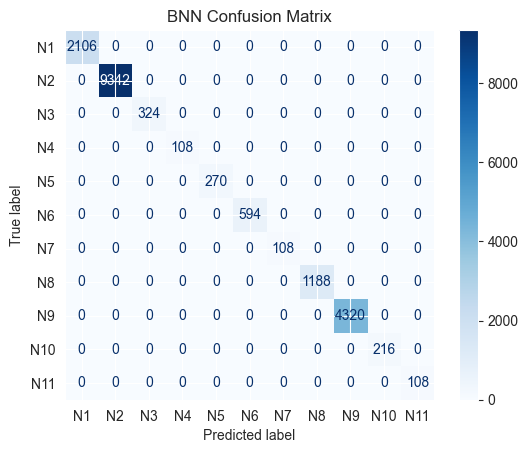

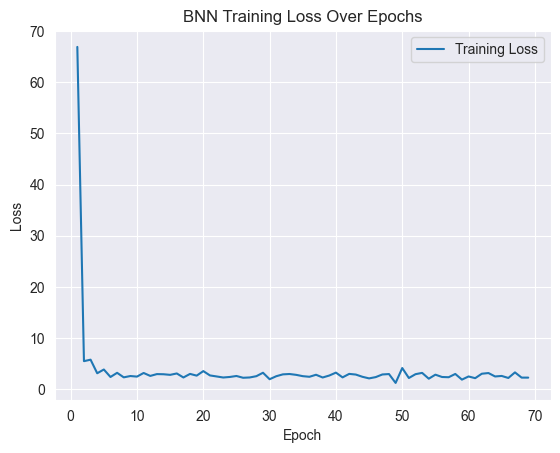

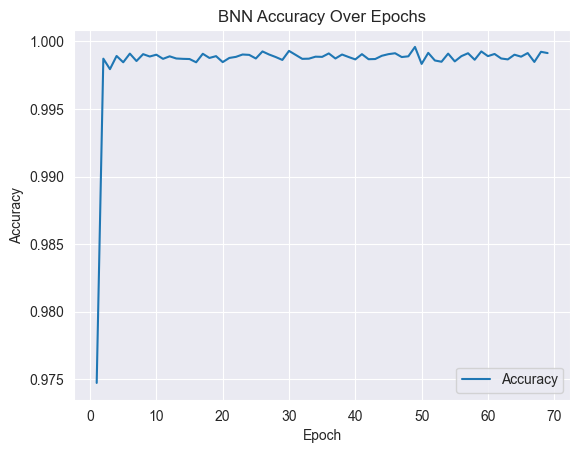

In [ ]:
"""BNN Model Setup"""

import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, balanced_accuracy_score
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix




embedding_data = torch.load("protbert_unpaired_embeddings.pt")

n2_count = len(unique_N2s)
unique_Nx_with_types = data[['Nx ID', 'Nx Type']].drop_duplicates()
nx_type_counts = unique_Nx_with_types.groupby('Nx Type')['Nx ID'].nunique()
types_of_names = ["N2"] + nx_type_counts.index.tolist()  # List of all types
count_of_types = [n2_count] + nx_type_counts.tolist()    # Corresponding counts


count_table = pd.DataFrame({
    "Type": types_of_names,
    "Unique Count": count_of_types
}).sort_values(by="Type", ascending=False)

display(count_table)


Na_types_as_ints = {
    "N1": 0, "N2": 1, "N3": 2, "N4": 3, "N5": 4,
    "N6": 5, "N7": 6, "N8": 7, "N9": 8, "N10": 9, "N11": 10
}
print(Na_types_as_ints)


print("Loading ProtBERT embeddings...")
embeddings_data = torch.load("protbert_individual_embeddings.pt")
protbert_embeddings = embeddings_data["embeddings"]  # Shape: (num_sequences, embedding_dim)
seq_names = embeddings_data["Sequence Names"]  # Corresponding labels

print(f"seq_names length: {len(seq_names)}")


sequence_na_types = [label.split("_")[2] for label in seq_names]


NA_types_yhat_list = [Na_types_as_ints[na] for na in sequence_na_types]


vectorized_NA_types_yhat = torch.tensor(NA_types_yhat_list, dtype=torch.long)


numeric_columns = unpaired_df.select_dtypes(include=["float64", "int64"]).columns
scaler = StandardScaler()
normalized_numeric_values = scaler.fit_transform(unpaired_df[numeric_columns])


normalized_tensor = torch.tensor(normalized_numeric_values, dtype=torch.float32)


combined_tensor = torch.cat([protbert_embeddings, normalized_tensor], dim=1)


X_train, X_test, y_train, y_test = train_test_split(
    combined_tensor, vectorized_NA_types_yhat, test_size=0.2, random_state=42, stratify=vectorized_NA_types_yhat
)


train_loader = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(
        X_train[:, :protbert_embeddings.shape[1]],  # ProtBERT embeddings
        X_train[:, protbert_embeddings.shape[1]:],  # Numeric features
        y_train
    ),
    batch_size=128,
    shuffle=True,
)
test_loader = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(
        X_test[:, :protbert_embeddings.shape[1]],  # ProtBERT embeddings
        X_test[:, protbert_embeddings.shape[1]:],  # Numeric features
        y_test
    ),
    batch_size=128,
    shuffle=False,
)

class BayesianNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(BayesianNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.5)

        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.5)

        self.fc4 = nn.Linear(128, num_classes)

    def forward(self, bert, numeric):
        x = torch.cat([bert, numeric], dim=1)
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x



input_size = combined_tensor.shape[1]
num_classes = len(Na_types_as_ints)
bnn = BayesianNN(input_size=input_size, num_classes=num_classes)


optimizer = torch.optim.Adam(bnn.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


class EarlyStopping:
    def __init__(self, patience=20, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = float('inf')

    def should_stop(self, current_loss):
        if self.best_loss - current_loss > self.min_delta:
            self.best_loss = current_loss
            self.counter = 0
        else:
            self.counter += 1
        return self.counter >= self.patience

early_stopping = EarlyStopping(patience=20)
criterion = nn.CrossEntropyLoss()


training_losses = []
accuracies = []

num_epochs = 500
print("Training BNN with enhanced architecture and optimizations...")
for epoch in range(num_epochs):
    bnn.train()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0

    for batch_bert, batch_numeric, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = bnn(batch_bert, batch_numeric)  # Forward pass
        loss = criterion(outputs, batch_y)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Optimization step
        total_loss += loss.item()


        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == batch_y).sum().item()
        total_samples += batch_y.size(0)


    epoch_accuracy = correct_predictions / total_samples
    accuracies.append(epoch_accuracy)
    training_losses.append(total_loss)


    scheduler.step(total_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")


    if early_stopping.should_stop(total_loss):
        print("Early stopping triggered.")
        break

print("Training complete.")


print("Evaluating BNN...")
bnn.eval()
all_y_true = []
all_y_pred = []

with torch.no_grad():
    for batch_bert, batch_numeric, batch_y in test_loader:
        outputs = bnn(batch_bert, batch_numeric)
        y_pred = outputs.argmax(dim=1)
        all_y_true.extend(batch_y.cpu().numpy())
        all_y_pred.extend(y_pred.cpu().numpy())


print("BNN Classification Report:")
print(classification_report(all_y_true, all_y_pred))


balanced_acc = balanced_accuracy_score(all_y_true, all_y_pred)
print(f"BNN Balanced Accuracy: {balanced_acc:.4f}")


cm = confusion_matrix(all_y_true, all_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(Na_types_as_ints.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title('BNN Confusion Matrix')
plt.show()


plt.figure()
plt.plot(range(1, len(training_losses) + 1), training_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('BNN Training Loss Over Epochs')
plt.legend()
plt.show()


plt.figure()
plt.plot(range(1, len(accuracies) + 1), accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('BNN Accuracy Over Epochs')
plt.legend()
plt.show()


hi


/var/folders/rl/njj5rh9j4119p395sml98s5r0000gq/T/ipykernel_62625/495658812.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embedding_data = torch.load("protbert_unpaire

,Type,Unique Count
10,N9,80
9,N8,22
8,N7,2
7,N6,11
6,N5,5
5,N4,2
4,N3,6
0,N2,54
3,N11,2
2,N10,4


{'N1': 0, 'N2': 1, 'N3': 2, 'N4': 3, 'N5': 4, 'N6': 5, 'N7': 6, 'N8': 7, 'N9': 8, 'N10': 9, 'N11': 10}


/var/folders/rl/njj5rh9j4119p395sml98s5r0000gq/T/ipykernel_62625/495658812.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings_data = torch.load("protbert_indivi

Training Transformer-based Model...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 1/500, Loss: 64.9619, Accuracy: 0.9766
Epoch 2/500, Loss: 5.1418, Accuracy: 0.9992
Epoch 3/500, Loss: 4.9898, Accuracy: 0.9982
Epoch 4/500, Loss: 2.5099, Accuracy: 0.9991
Epoch 5/500, Loss: 3.2817, Accuracy: 0.9987
Epoch 6/500, Loss: 2.9620, Accuracy: 0.9987
Epoch 7/500, Loss: 3.0932, Accuracy: 0.9988
Epoch 8/500, Loss: 2.8347, Accuracy: 0.9988
Epoch 9/500, Loss: 1.9715, Accuracy: 0.9993
Epoch 10/500, Loss: 3.1200, Accuracy: 0.9986
Epoch 11/500, Loss: 2.2037, Accuracy: 0.9992
Epoch 12/500, Loss: 3.0473, Accuracy: 0.9988
Epoch 13/500, Loss: 2.4246, Accuracy: 0.9990
Epoch 14/500, Loss: 3.5073, Accuracy: 0.9985
Epoch 15/500, Loss: 2.7847, Accuracy: 0.9989
Epoch 16/500, Loss: 2.5397, Accuracy: 0.9988
Epoch 17/500, Loss: 2.9660, Accuracy: 0.9986
Epoch 18/500, Loss: 2.4026, Accuracy: 0.9990
Epoch 19/500, Loss: 2.2554, Accuracy: 0.9990
Epoch 20/500, Loss: 2.4900, Accuracy: 0.9991
Epoch 21/500, Loss: 2.6114, Accuracy: 0.9989
Epoch 22/500, Loss: 3.1795, Accuracy: 0.9985
Epoch 23/500, Loss

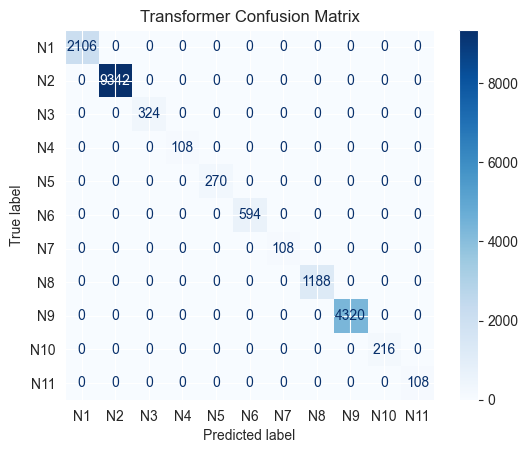

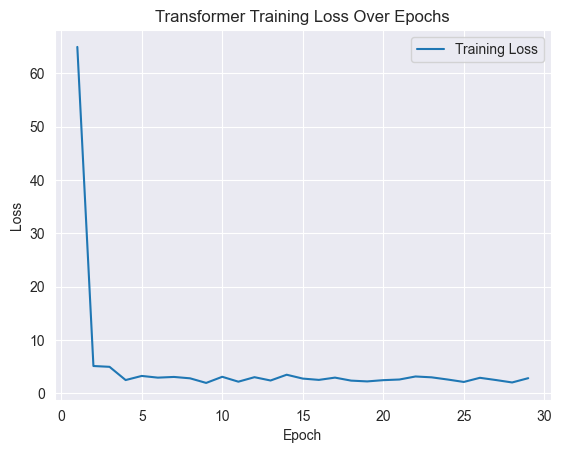

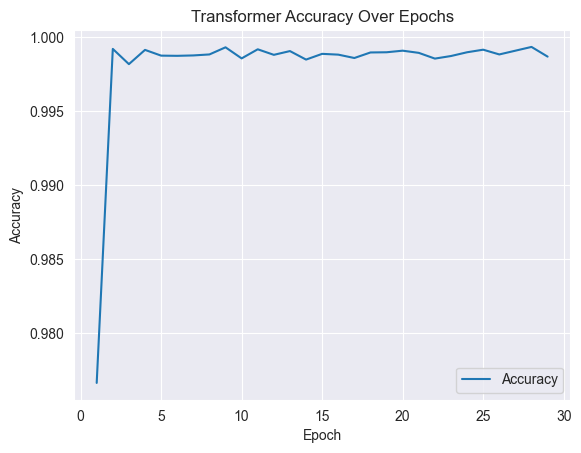

In [ ]:
"""Transformer-Based Architecture with Early Stopping"""

import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


embedding_data = torch.load("protbert_unpaired_embeddings.pt")


n2_count = len(unique_N2s)
unique_Nx_with_types = data[['Nx ID', 'Nx Type']].drop_duplicates()
nx_type_counts = unique_Nx_with_types.groupby('Nx Type')['Nx ID'].nunique()
types_of_names = ["N2"] + nx_type_counts.index.tolist()
count_of_types = [n2_count] + nx_type_counts.tolist()


count_table = pd.DataFrame({
    "Type": types_of_names,
    "Unique Count": count_of_types
}).sort_values(by="Type", ascending=False)
display(count_table)


Na_types_as_ints = {
    "N1": 0, "N2": 1, "N3": 2, "N4": 3, "N5": 4,
    "N6": 5, "N7": 6, "N8": 7, "N9": 8, "N10": 9, "N11": 10
}
print(Na_types_as_ints)


embeddings_data = torch.load("protbert_individual_embeddings.pt")
protbert_embeddings = embeddings_data["embeddings"]
seq_names = embeddings_data["Sequence Names"]


sequence_na_types = [label.split("_")[2] for label in seq_names]
NA_types_yhat_list = [Na_types_as_ints[na] for na in sequence_na_types]
vectorized_NA_types_yhat = torch.tensor(NA_types_yhat_list, dtype=torch.long)


numeric_columns = unpaired_df.select_dtypes(include=["float64", "int64"]).columns
scaler = StandardScaler()
normalized_numeric_values = scaler.fit_transform(unpaired_df[numeric_columns])
normalized_tensor = torch.tensor(normalized_numeric_values, dtype=torch.float32)


combined_tensor = torch.cat([protbert_embeddings, normalized_tensor], dim=1)


X_train, X_test, y_train, y_test = train_test_split(
    combined_tensor, vectorized_NA_types_yhat, test_size=0.2, random_state=42, stratify=vectorized_NA_types_yhat
)


train_loader = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(X_train, y_train),
    batch_size=128,
    shuffle=True,
)
test_loader = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(X_test, y_test),
    batch_size=128,
    shuffle=False,
)


class TransformerNN(nn.Module):
    def __init__(self, input_size, num_classes, dropout=0.5): # Match in refference to the parameters of the BNN
        super(TransformerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)  # Match input size with BNN
        self.bn1 = nn.BatchNorm1d(512)        # Match batch normalization
        self.dropout1 = nn.Dropout(dropout)   # Match dropout

        self.fc2 = nn.Linear(512, 256)        # Match hidden layer sizes
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(dropout)

        self.fc3 = nn.Linear(256, 128)        # Match next hidden layer
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(dropout)

        self.fc4 = nn.Linear(128, num_classes)  # Match output size

    def forward(self, bert, numeric):

        x = torch.cat([bert, numeric], dim=1)  # Identical to BNN
        x = torch.relu(self.bn1(self.fc1(x)))  # Match activation function
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x



input_size = combined_tensor.shape[1]  # Combined size of ProtBERT embeddings + numeric features
num_classes = len(Na_types_as_ints)
transformer_model = TransformerNN(input_size=input_size, num_classes=num_classes, dropout=0.5)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(transformer_model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


class EarlyStopping:
    def __init__(self, patience=20, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = float('inf')

    def should_stop(self, current_loss):
        if self.best_loss - current_loss > self.min_delta:
            self.best_loss = current_loss
            self.counter = 0
        else:
            self.counter += 1
        return self.counter >= self.patience

early_stopping = EarlyStopping(patience=20)


training_losses = []
accuracies = []

num_epochs = 500
print("Training Transformer-based Model...")
for epoch in range(num_epochs):
    transformer_model.train()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = transformer_model(batch_X[:, :protbert_embeddings.shape[1]], batch_X[:, protbert_embeddings.shape[1]:])
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()


        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == batch_y).sum().item()
        total_samples += batch_y.size(0)

    epoch_accuracy = correct_predictions / total_samples
    accuracies.append(epoch_accuracy)
    training_losses.append(total_loss)

    scheduler.step(total_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

    if early_stopping.should_stop(total_loss):
        print("Early stopping triggered.")
        break

print("Training complete.")


print("Evaluating Transformer-based Model...")
transformer_model.eval()
all_y_true = []
all_y_pred = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = transformer_model(batch_X[:, :protbert_embeddings.shape[1]], batch_X[:, protbert_embeddings.shape[1]:])
        y_pred = outputs.argmax(dim=1)
        all_y_true.extend(batch_y.cpu().numpy())
        all_y_pred.extend(y_pred.cpu().numpy())


print("Transformer Classification Report:")
print(classification_report(all_y_true, all_y_pred))
balanced_acc = balanced_accuracy_score(all_y_true, all_y_pred)
print(f"Transformer Balanced Accuracy: {balanced_acc:.4f}")


cm = confusion_matrix(all_y_true, all_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(Na_types_as_ints.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Transformer Confusion Matrix")
plt.show()


plt.figure()
plt.plot(range(1, len(training_losses) + 1), training_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Transformer Training Loss Over Epochs")
plt.legend()
plt.show()


plt.figure()
plt.plot(range(1, len(accuracies) + 1), accuracies, label="Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Transformer Accuracy Over Epochs")
plt.legend()
plt.show()
